https://towardsai.net/p/nlp/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from IPython.display import display

# NLP
import nltk


### 🔴 1. Exploration
- Import and shuffle dataset
- Change labels Neg: 0, Pos: 1
- Print examples in each class
- Train Test Split

In [2]:
# Import, shuffle, numeric labels
df = pd.read_csv('car_reviews (1).csv')
df = df.sample(frac=1, random_state=42)
df['Sentiment'] = df.Sentiment.map({'Neg': 0, 'Pos': 1})
display(df.head())

# Class balance
print('Class Balance: ')
display(df.Sentiment.value_counts())

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], train_size=0.8, random_state=1)

print(f'\nTotal rows: {df.shape[0]}')
print(f'Train rows: {X_train.shape[0]}')
print(f'Test rows: {X_test.shape[0]}')

,Sentiment,Review
309,0,That 2001 Ford Explorer you may be considerin...
741,1,Get an old Tempo and stick to your beat Yes...
265,0,My wife and I lease a 1997 FORD RANGER XLT S...
823,1,I wanted a Ford Mustang Convertible for years...
778,1,We traded in our Ford Explorer on an 1998 Edd...


Class Balance: 


0    691
1    691
Name: Sentiment, dtype: int64


Total rows: 1382
Train rows: 1105
Test rows: 277


### 🔴 2. Preprocessing (Bag of Words)

- Transform and fit training data
- Transform testing data

**Notes on CountVectorizer** 
- Implemented with stemming. Stemming turns similar words e.g. studying, study, studied into a single word: 'studi'

- Converts tokenized words to lower case with parameter `lowercase = True`. 'He' and 'he' are not treated differently. 

- Ignores all punctuation using parameter `token_pattern` which has a default regular expression which selects tokens of 2 or more alphanumeric characters.

- Ignores all stop English stop words with parameter `stop_words='english'` (stop words are the most commonly used words e.g. 'am, 'and', 'the'). 
This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of sentiment.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# (Optional) Visualisation example
print('Example of the first 5 rows for visualisation: ')
count_vector = CountVectorizer(lowercase=True, stop_words='english')
count_vector.fit(X_train[0:5])
frequency_matrix = pd.DataFrame(count_vector.transform(X_train[0:5]).toarray(), columns = count_vector.get_feature_names())
display(frequency_matrix)

# Stemming function from: https://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/counting-and-stemming/
# Stemming turns similar words e.g. studying, study, studied into a single word: 'studi'
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Instantiate the CountVectorizer method (for tokenization)
count_vector = CountVectorizer(lowercase=True, stop_words='english', tokenizer=textblob_tokenizer)

# Transform and fit training data and return matrix
X_train = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test = count_vector.transform(X_test)

Example of the first 5 rows for visualisation: 


,00,01,10,101k,11,112,120,15,1500,18,...,writer,writing,year,years,yo,yuk,yyvonne,zetec,zone,zx2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,1,0,0,0,0
3,3,1,1,0,0,1,1,1,0,0,...,1,1,2,4,0,0,1,0,1,0
4,0,0,0,1,1,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0


C:\Users\johng\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

### 🔴 3. Training and Testing

In [5]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate and fit Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [6]:

# Evaluate Naive Bayes
predictions = naive_bayes.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7689530685920578
Precision score:  0.7482517482517482
Recall score:  0.7925925925925926
F1 score:  0.7697841726618705


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def remove_text_inside_brackets(text, brackets="()[]"):
    count = [0] * (len(brackets) // 2) # count open/close brackets
    saved_chars = []
    for character in text:
        for i, b in enumerate(brackets):
            if character == b: # found bracket
                kind, is_close = divmod(i, 2)
                count[kind] += (-1)**is_close # `+1`: open, `-1`: close
                if count[kind] < 0: # unbalanced bracket
                    count[kind] = 0  # keep it
                else:  # found bracket to remove
                    break
        else: # character is not a [balanced] bracket
            if not any(count): # outside brackets
                saved_chars.append(character)
    return ''.join(saved_chars)

def cmx_sklearn(models, test_examples, test_labels, dim=4):
    
    '''
    Plots Confusion Matrix for sklearn list of models
    
    '''
    cmxs = []
    
    for model in models:
            
            preds = model.predict(test_examples)
            labels = test_labels

            cmx_non_normal = tf.math.confusion_matrix(labels, preds).numpy() # Create Confusion Matrix
            cmx0 = cmx_non_normal[0] / cmx_non_normal[0].sum()
            cmx1 = cmx_non_normal[1] / cmx_non_normal[1].sum()
            cmx = np.stack((cmx0, cmx1), axis=0)
            cmxs.append(cmx)

    plt.figure(figsize=(25,20))
    for n in range(len(cmxs)):
        # Plot confusion matrix
        ax = plt.subplot(dim, dim, n+1)
        sns.heatmap(cmxs[n], cmap=['skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'darkblue'])

        # xylabels and title
        plt.title(remove_text_inside_brackets(str(models[n])))
        plt.xlabel('PREDICTIONS')
        plt.ylabel('LABELS')

        # Label ticks
        ax.set_xticklabels(['Background', 'Signal'])
        ax.set_yticklabels(['Background', 'Signal'])
        # Align ticks
        plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
                 rotation_mode="anchor")

        # Text Annotations for Blocks in CMX
        for i in range(2):
            for j in range(2):

                value = int(np.round(100*cmxs[n][i, j], 0))

                text = ax.text(j+0.5, 
                               i+0.5, 
                               value,
                               ha="center", 
                               va="center", 
                               color="orangered", 
                               fontsize = 20)
        plt.axis("off")
    plt.show()      
    print(cmxs)

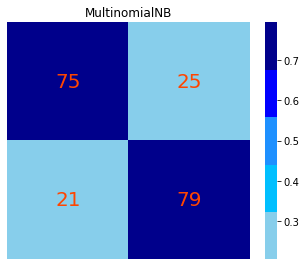

[array([[0.74647887, 0.25352113],
       [0.20740741, 0.79259259]])]


In [8]:
cmx_sklearn([naive_bayes], X_test, y_test)